In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Énoncé
Vous êtes missionné sur le projet de nettoyage et exploration des données en interne, afin de déterminer la faisabilité de cette idée d’application de Santé publique France. 

 1- Présentation des données

In [189]:
prod = pd.read_csv('prod.csv', sep='\t', low_memory=False )
prod.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [191]:
prod.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

In [192]:
for col in prod.columns:
      print(col)

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
generic_name
quantity
packaging
packaging_tags
brands
brands_tags
categories
categories_tags
categories_fr
origins
origins_tags
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_fr
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_fr
ingredients_text
allergens
allergens_fr
traces
traces_tags
traces_fr
serving_size
no_nutriments
additives_n
additives
additives_tags
additives_fr
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutrition_grade_uk
nutrition_grade_fr
pnns_groups_1
pnns_groups_2
states
states_tags
states_fr
main_category
main_category_fr
image_url
image_small_url
energy_100g
energy-from-fat_100g
fat_100g
saturated-fat_100g
butyr

2- Nettoyage des données. 

In [34]:
list(prod.columns)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

# 

- Création de la version_1 de l'echantillon de dataframe après suppression de certaines colonnes.
    Les colonnes supprimées possèdent des données  n'ateignant pas 50% de la taille de l'effectif, exceptés les colonnes "pnns_groups_1" et "pnns_groups_2".

In [59]:
prod_epur = pd.DataFrame(prod, columns=['code', 'creator','url','created_datetime', 'last_modified_datetime','product_name', 'brands',
 'brands_tags', 'countries', 'countries_tags', 'countries_fr', 'ingredients_text', 'serving_size', 'additives_n', 'additives',
 'ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n', 'states','states_tags','states_fr','nutrition_grade_fr',
 'pnns_groups_1', 'pnns_groups_2','energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','fiber_100g',
 'proteins_100g', 'salt_100g', 'sodium_100g','nutrition-score-fr_100g','nutrition-score-uk_100g'])
prod_epur


,code,creator,url,created_datetime,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,openfoodfacts-contributors,http://world-fr.openfoodfacts.org/produit/0000...,2016-09-17T09:17:46Z,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,en:FR,en:france,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,usda-ndb-import,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,US,en:united-states,...,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,0000000004559,usda-ndb-import,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,...,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,0000000016087,usda-ndb-import,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,grizzlies,US,en:united-states,...,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,0000000016094,usda-ndb-import,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,bob-s-red-mill,US,en:united-states,...,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,openfoodfacts-contributors,http://world-fr.openfoodfacts.org/produit/9948...,2017-03-27T16:14:59Z,2017-04-03T18:34:58Z,Tomato & ricotta,Panzani,panzani,en:RO,en:romania,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,usda-ndb-import,http://world-fr.openfoodfacts.org/produit/9956...,2017-03-09T11:31:16Z,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,trader-joe-s,US,en:united-states,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,0.0
320769,9970229501521,tomato,http://world-fr.openfoodfacts.org/produit/9970...,2015-01-24T11:36:17Z,2017-04-03T18:34:59Z,乐吧泡菜味薯片,乐吧,乐吧,China,en:china,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,openfoodfacts-contributors,http://world-fr.openfoodfacts.org/produit/9980...,2017-04-16T10:54:49Z,2017-04-16T10:54:49Z,Tomates aux Vermicelles,Knorr,knorr,en:FR,en:france,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

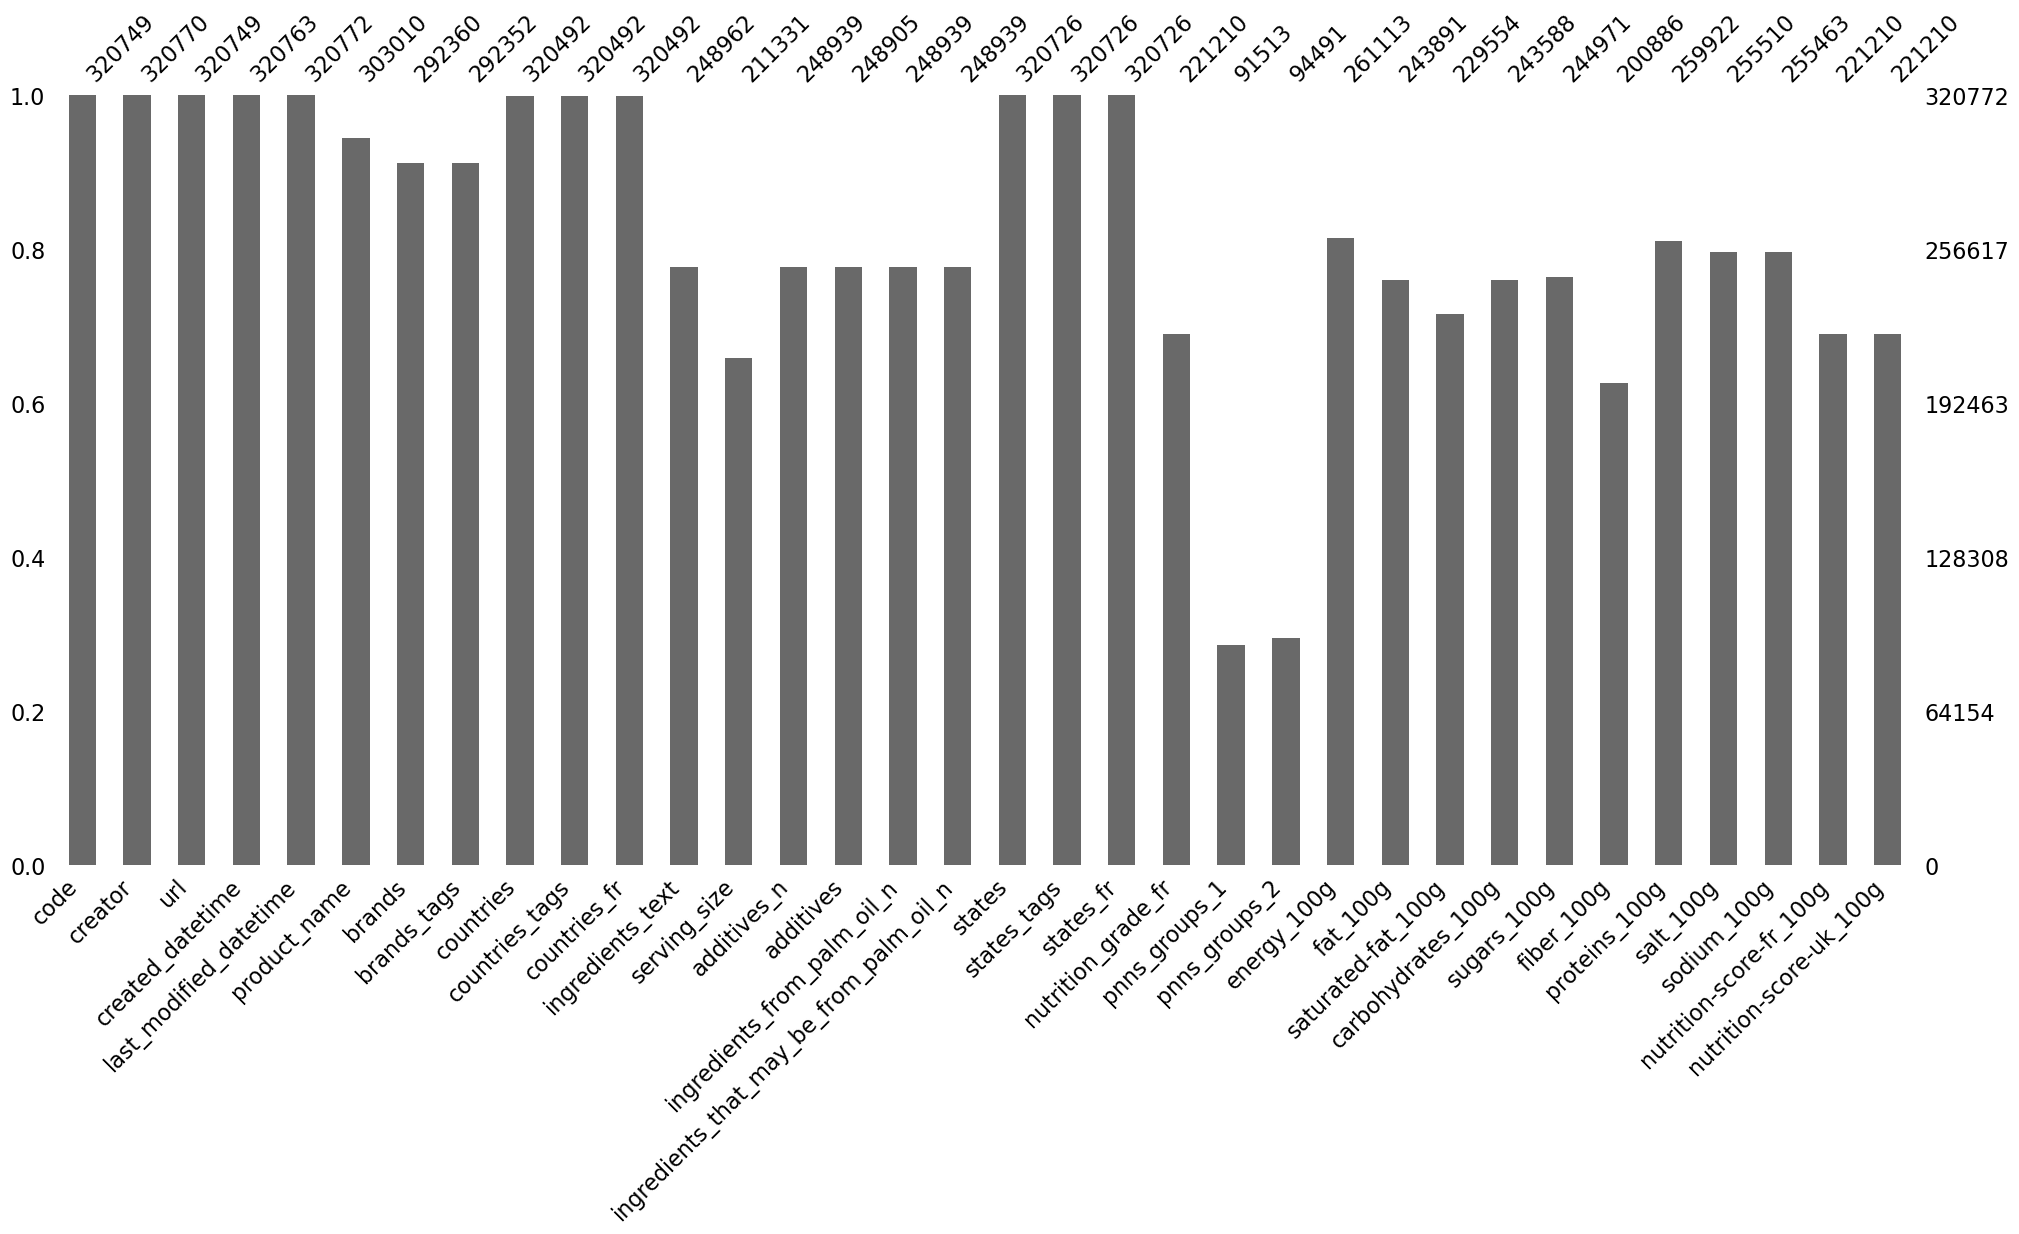

In [60]:
msno.bar(prod_epur)

<AxesSubplot:>

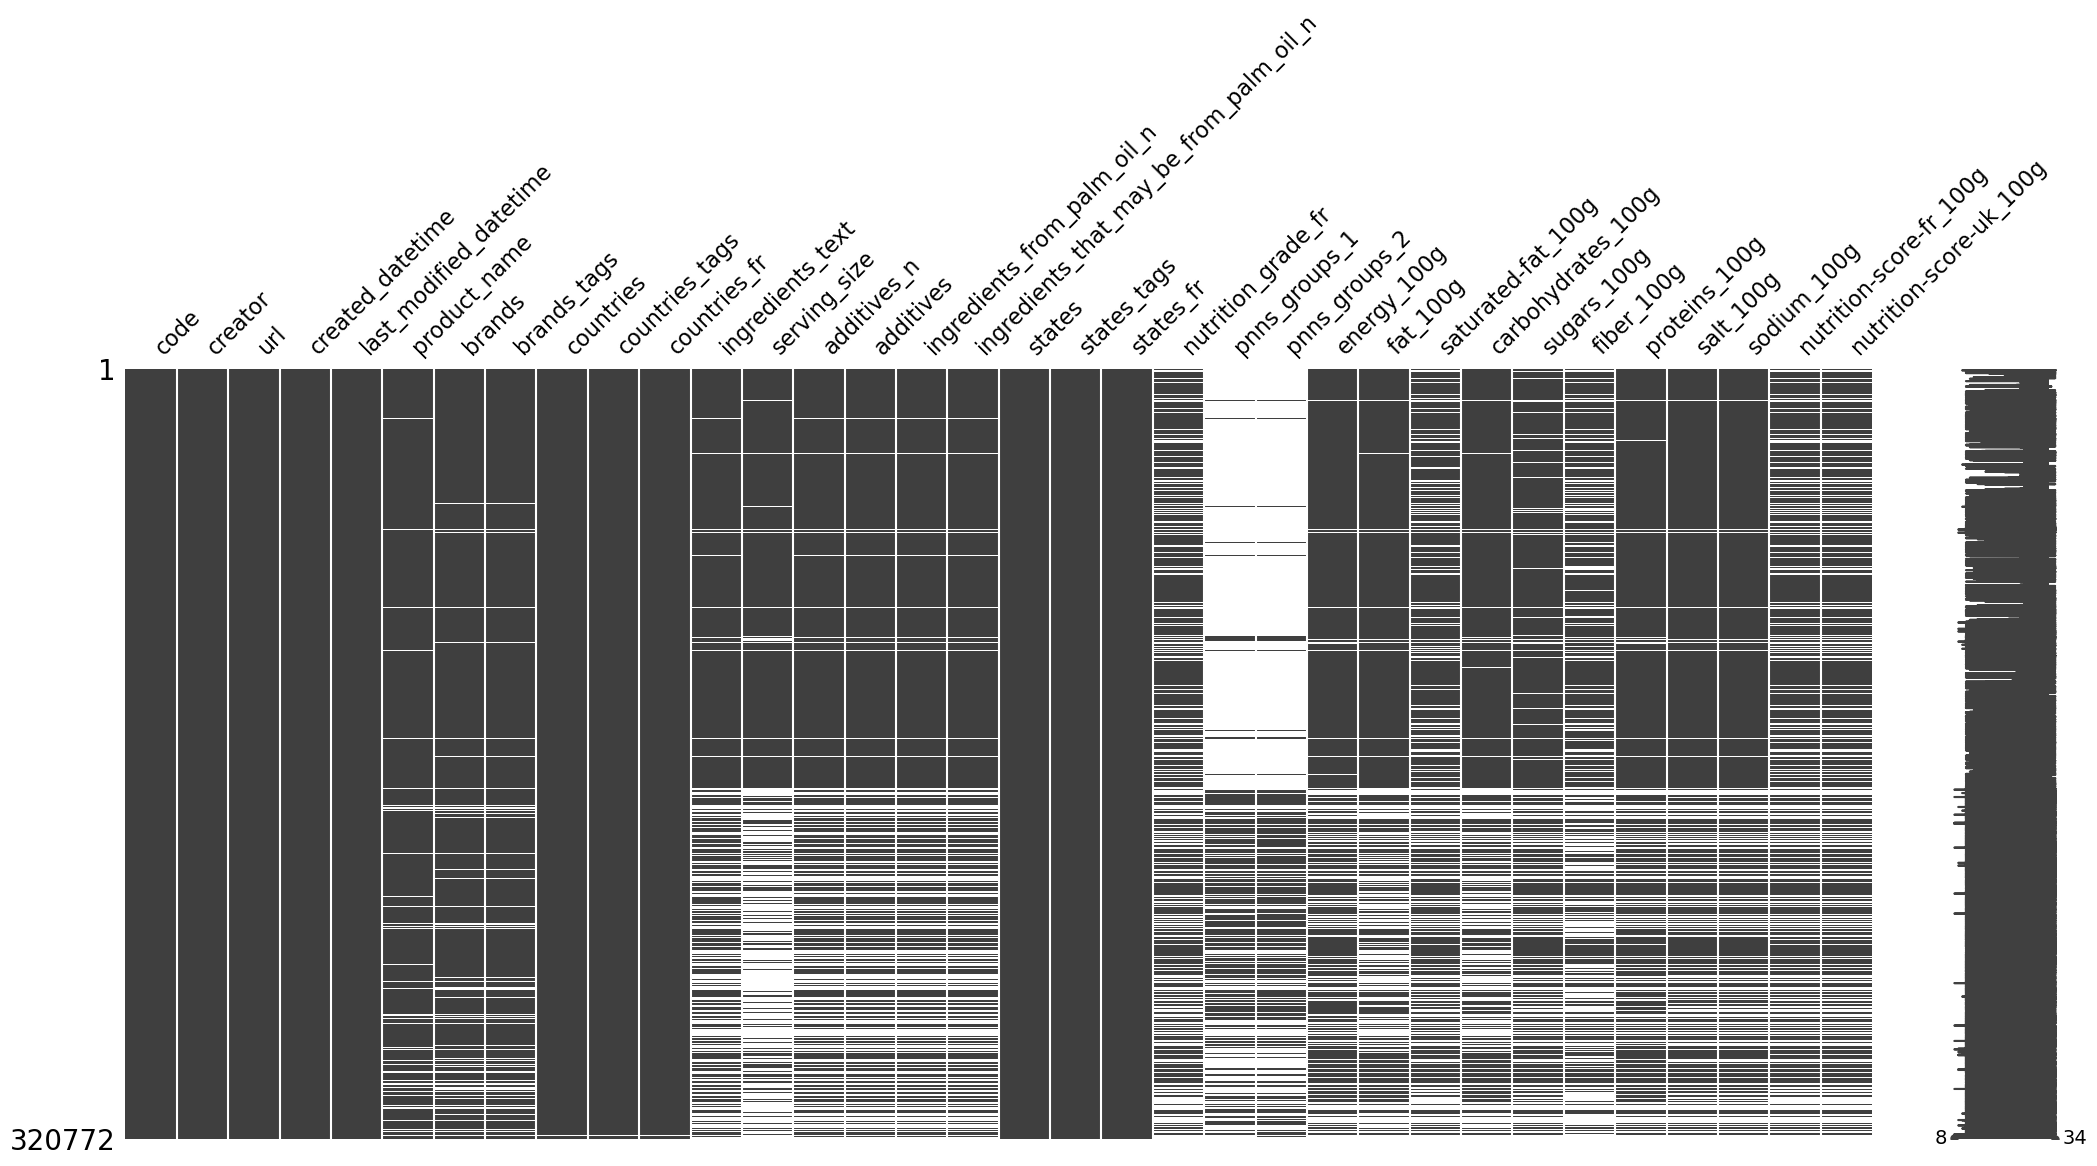

In [61]:
msno.matrix(prod_epur)

 - Suppression de toutes les lignes dont le code du produit n'est pas renseigné

In [68]:
ep1=prod_epur.dropna(subset=['code'])
ep1

,code,creator,url,created_datetime,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,openfoodfacts-contributors,http://world-fr.openfoodfacts.org/produit/0000...,2016-09-17T09:17:46Z,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,en:FR,en:france,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,usda-ndb-import,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,US,en:united-states,...,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,0000000004559,usda-ndb-import,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,...,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,0000000016087,usda-ndb-import,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,grizzlies,US,en:united-states,...,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,0000000016094,usda-ndb-import,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,bob-s-red-mill,US,en:united-states,...,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,openfoodfacts-contributors,http://world-fr.openfoodfacts.org/produit/9948...,2017-03-27T16:14:59Z,2017-04-03T18:34:58Z,Tomato & ricotta,Panzani,panzani,en:RO,en:romania,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,usda-ndb-import,http://world-fr.openfoodfacts.org/produit/9956...,2017-03-09T11:31:16Z,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,trader-joe-s,US,en:united-states,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,0.0
320769,9970229501521,tomato,http://world-fr.openfoodfacts.org/produit/9970...,2015-01-24T11:36:17Z,2017-04-03T18:34:59Z,乐吧泡菜味薯片,乐吧,乐吧,China,en:china,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,openfoodfacts-contributors,http://world-fr.openfoodfacts.org/produit/9980...,2017-04-16T10:54:49Z,2017-04-16T10:54:49Z,Tomates aux Vermicelles,Knorr,knorr,en:FR,en:france,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Suppression de toutes les lignes dont le nom produit 'product_name' n'est pas renseigné

In [166]:
epp1=ep1.dropna(subset=['product_name'])
epp1

,code,creator,url,created_datetime,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,openfoodfacts-contributors,http://world-fr.openfoodfacts.org/produit/0000...,2016-09-17T09:17:46Z,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,en:FR,en:france,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,usda-ndb-import,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,US,en:united-states,...,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,0000000004559,usda-ndb-import,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,...,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,0000000016087,usda-ndb-import,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,grizzlies,US,en:united-states,...,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,0000000016094,usda-ndb-import,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,bob-s-red-mill,US,en:united-states,...,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,openfoodfacts-contributors,http://world-fr.openfoodfacts.org/produit/9948...,2017-03-27T16:14:59Z,2017-04-03T18:34:58Z,Tomato & ricotta,Panzani,panzani,en:RO,en:romania,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,usda-ndb-import,http://world-fr.openfoodfacts.org/produit/9956...,2017-03-09T11:31:16Z,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,trader-joe-s,US,en:united-states,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,0.0
320769,9970229501521,tomato,http://world-fr.openfoodfacts.org/produit/9970...,2015-01-24T11:36:17Z,2017-04-03T18:34:59Z,乐吧泡菜味薯片,乐吧,乐吧,China,en:china,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,openfoodfacts-contributors,http://world-fr.openfoodfacts.org/produit/9980...,2017-04-16T10:54:49Z,2017-04-16T10:54:49Z,Tomates aux Vermicelles,Knorr,knorr,en:FR,en:france,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
epp1.isnull().sum()

code                                            0
creator                                         1
url                                             0
created_datetime                                1
last_modified_datetime                          0
product_name                                    0
brands                                      13051
brands_tags                                 13059
countries                                     228
countries_tags                                228
countries_fr                                  228
ingredients_text                            55896
serving_size                                93596
additives_n                                 55896
additives                                   55927
ingredients_from_palm_oil_n                 55896
ingredients_that_may_be_from_palm_oil_n     55896
states                                         23
states_tags                                    23
states_fr                                      23


- Le pourcentage de données manquantes pour chaque colonne retenue

In [168]:
manq =epp1.isna().mean()
manq = manq * 100
manq

code                                        0.000000
creator                                     0.000330
url                                         0.000000
created_datetime                            0.000330
last_modified_datetime                      0.000000
product_name                                0.000000
brands                                      4.307446
brands_tags                                 4.310086
countries                                   0.075251
countries_tags                              0.075251
countries_fr                                0.075251
ingredients_text                           18.448316
serving_size                               30.891094
additives_n                                18.448316
additives                                  18.458548
ingredients_from_palm_oil_n                18.448316
ingredients_that_may_be_from_palm_oil_n    18.448316
states                                      0.007591
states_tags                                 0.

# - Recherche de duplicatas 

In [172]:
dup1= epp1.loc[prod_epur['product_name'].duplicated(keep=False),:]
dup1

,code,creator,url,created_datetime,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,openfoodfacts-contributors,http://world-fr.openfoodfacts.org/produit/0000...,2016-09-17T09:17:46Z,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,en:FR,en:france,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000004559,usda-ndb-import,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,...,17.86,0.00,60.71,17.86,7.1,17.86,0.6350,0.25000,0.0,0.0
4,0000000016094,usda-ndb-import,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,bob-s-red-mill,US,en:united-states,...,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN
6,0000000016117,usda-ndb-import,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:35:30Z,2017-03-09T10:35:30Z,Organic Long Grain White Rice,Lundberg,lundberg,US,en:united-states,...,NaN,NaN,80.00,NaN,NaN,8.89,NaN,NaN,NaN,NaN
7,0000000016124,usda-ndb-import,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:35:11Z,2017-03-09T10:35:12Z,Organic Muesli,Daddy's Muesli,daddy-s-muesli,US,en:united-states,...,18.75,4.69,57.81,15.62,9.4,14.06,0.1397,0.05500,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320753,9871311007,aleene,http://world-fr.openfoodfacts.org/produit/9871...,2015-10-11T11:08:24Z,2015-10-11T11:12:51Z,Lager,Carib,carib,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320754,9876567898765,openfoodfacts-contributors,http://world-fr.openfoodfacts.org/produit/9876...,2016-08-26T23:17:08Z,2016-08-26T23:17:08Z,nf test,NaN,NaN,en:CH,en:switzerland,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320757,9900000000233,kiliweb,http://world-fr.openfoodfacts.org/produit/9900...,2017-04-01T20:52:18Z,2017-04-01T20:52:19Z,Amandes,Biosic,biosic,France,en:france,...,NaN,3.73,NaN,3.89,12.2,21.22,0.1000,0.03937,0.0,0.0
320760,99044169,date-limite-app,http://world-fr.openfoodfacts.org/produit/9904...,2015-01-21T20:50:58Z,2016-04-17T13:04:46Z,Poireaux,NaN,NaN,en:FR,en:france,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
vue1= list(dup1['product_name']) 
vue1

['Farine de blé noir',
 'Peanuts',
 'Organic Polenta',
 'Organic Long Grain White Rice',
 'Organic Muesli',
 'Organic Sunflower Oil',
 'Organic Golden Flax Seeds',
 'Organic Sweetened Banana Chips',
 'Organic Red Quinoa',
 'Organic Coconut Chips',
 'Organic Black Beans',
 'Organic Black Chia Seeds',
 nan,
 'Organic French Green Lentils',
 'Organic Garbanzo Beans',
 'Organic Green Split Peas',
 'Organic Dark Red Kidney Bean',
 'Super Nutty Granola',
 'Organic Couscous',
 'Organic Spaghetti',
 'Fine Sea Salt',
 'Organic White Sesame Seeds',
 'Roasted Salted Sunflower Seeds',
 'Organic Raw Walnuts',
 'Organic Raw Sunflower Seeds',
 'Organic Trail Mix',
 'Unsalted Dry Roasted Almonds',
 'Organic Extra Virgin Olive Oil',
 'Liquid Aminos',
 'Organic Grade B Maple Syrup',
 'Yogurt Pretzels',
 'Organic Kamut Flakes',
 'Organic Popcorn',
 'Organic Pearled Barley',
 'Organic Oat Bran',
 'Organic Regular Rolled Oats',
 'Organic Short Grain Brown Rice',
 'Organic Wild Rice',
 'Vanilla Extract',
 '

- Remarque: Après traitement il n'y plus de doublon dans la variable "code".

In [173]:
dup2= epp1.loc[prod_epur['code'].duplicated(keep=False),:]
dup2

,code,creator,url,created_datetime,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g


# 

- Le nombre de données manquantes dans les différentes colonnes :

In [174]:
epp1.isnull().sum()

code                                            0
creator                                         1
url                                             0
created_datetime                                1
last_modified_datetime                          0
product_name                                    0
brands                                      13051
brands_tags                                 13059
countries                                     228
countries_tags                                228
countries_fr                                  228
ingredients_text                            55896
serving_size                                93596
additives_n                                 55896
additives                                   55927
ingredients_from_palm_oil_n                 55896
ingredients_that_may_be_from_palm_oil_n     55896
states                                         23
states_tags                                    23
states_fr                                      23


# Exploration des données

- Traitement des outliers pour certaines variables quantitatives (numeriques)

In [226]:
aa= list(epp1['proteins_100g'])

In [221]:
aa

[nan,
 3.57,
 17.86,
 17.86,
 8.57,
 13.46,
 8.89,
 14.06,
 5.0,
 nan,
 22.92,
 14.04,
 16.67,
 19.05,
 30.3,
 14.55,
 14.29,
 3.33,
 8.89,
 16.67,
 7.5,
 13.33,
 10.91,
 6.67,
 8.89,
 nan,
 12.96,
 16.67,
 16.67,
 20.0,
 6.67,
 13.33,
 5.0,
 14.29,
 11.76,
 10.91,
 nan,
 10.71,
 6.0,
 22.22,
 12.77,
 12.77,
 10.71,
 7.5,
 12.73,
 14.29,
 nan,
 nan,
 26.67,
 17.02,
 28.89,
 22.22,
 24.44,
 28.89,
 28.89,
 23.53,
 20.0,
 19.57,
 10.91,
 10.91,
 10.91,
 10.91,
 14.29,
 14.04,
 13.85,
 13.33,
 12.5,
 12.07,
 13.33,
 13.79,
 nan,
 nan,
 10.0,
 12.9,
 14.71,
 10.0,
 9.09,
 11.43,
 14.29,
 25.0,
 16.67,
 16.67,
 19.44,
 21.43,
 28.57,
 21.43,
 21.43,
 17.86,
 12.0,
 16.0,
 18.18,
 13.33,
 10.56,
 26.67,
 30.0,
 nan,
 11.6,
 nan,
 11.11,
 11.11,
 nan,
 25.0,
 22.86,
 10.0,
 10.0,
 2.5,
 7.5,
 26.47,
 5.0,
 10.0,
 15.38,
 15.38,
 12.5,
 12.2,
 10.71,
 13.16,
 12.5,
 12.73,
 13.04,
 12.5,
 12.0,
 14.89,
 10.0,
 13.33,
 13.33,
 20.69,
 15.38,
 15.38,
 16.0,
 17.5,
 15.22,
 17.5,
 6.67,
 13.33,
 

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


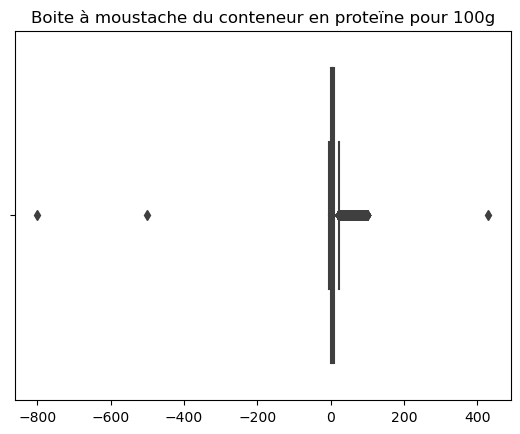

In [222]:
sns.boxplot(aa)
plt.title('Boite à moustache du conteneur en proteïne pour 100g')
plt.show()

In [177]:
bb= list(epp1['salt_100g'])
bb

[nan,
 0.0,
 0.635,
 1.22428,
 nan,
 nan,
 nan,
 0.1397,
 nan,
 nan,
 nan,
 nan,
 1.60782,
 0.09652,
 0.57658,
 0.02286,
 0.01016,
 nan,
 nan,
 0.0254,
 0.28448,
 0.46482,
 0.02286,
 1.27,
 0.19812,
 96.15678,
 0.28194,
 1.016,
 1.35382,
 2.032,
 nan,
 0.01016,
 0.127,
 nan,
 0.27432,
 0.04572,
 nan,
 nan,
 0.09398,
 nan,
 nan,
 nan,
 0.04572,
 1.651,
 nan,
 0.04572,
 nan,
 nan,
 0.08382,
 0.05334,
 0.05588,
 0.17526,
 0.04572,
 0.01778,
 0.05588,
 0.0508,
 0.02794,
 0.02794,
 0.254,
 0.254,
 0.254,
 0.18542,
 nan,
 0.11684,
 1.13284,
 0.02794,
 nan,
 nan,
 nan,
 2.75844,
 99.90582,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.254,
 nan,
 nan,
 0.54356,
 nan,
 nan,
 0.07112,
 1.54178,
 1.13284,
 1.08966,
 1.08966,
 0.58928,
 0.2032,
 nan,
 nan,
 0.127,
 nan,
 nan,
 0.04318,
 nan,
 11.176,
 nan,
 13.54582,
 13.26388,
 0.03302,
 2.29616,
 1.81356,
 0.71882,
 0.21082,
 0.09652,
 0.09652,
 0.97028,
 1.143,
 nan,
 nan,
 nan,
 0.03048,
 nan,
 nan,
 nan,
 nan,
 0.02286,
 0.02794,
 nan,
 nan,
 nan,
 0.020

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


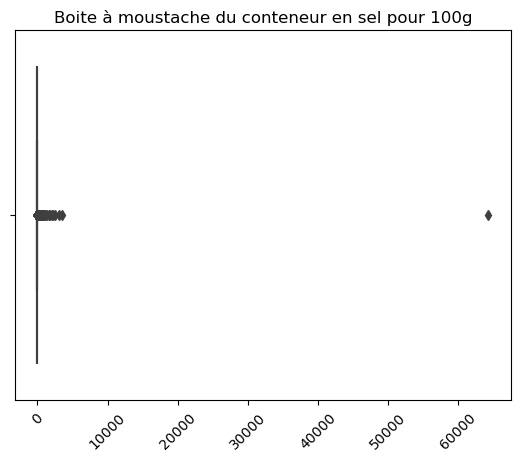

In [223]:
sns.boxplot(bb)
plt.title('Boite à moustache du conteneur en sel pour 100g')
plt.xticks(rotation= 45)
plt.show()

In [224]:
cc= list(epp1['fiber_100g'])
cc

[nan,
 3.6,
 7.1,
 7.1,
 5.7,
 7.7,
 nan,
 9.4,
 7.5,
 nan,
 12.5,
 1.8,
 6.7,
 38.1,
 15.2,
 9.1,
 10.7,
 3.3,
 2.2,
 9.5,
 5.0,
 6.7,
 9.1,
 10.0,
 4.4,
 nan,
 9.3,
 3.3,
 3.3,
 10.0,
 6.7,
 8.9,
 7.5,
 7.1,
 9.8,
 7.3,
 nan,
 7.1,
 16.0,
 24.4,
 10.6,
 12.8,
 7.1,
 7.5,
 9.1,
 39.3,
 nan,
 nan,
 15.6,
 14.9,
 28.9,
 44.4,
 26.7,
 33.3,
 28.9,
 15.7,
 26.7,
 13.0,
 7.3,
 7.3,
 9.1,
 9.1,
 10.7,
 1.8,
 3.1,
 4.4,
 3.6,
 1.7,
 3.3,
 6.9,
 nan,
 nan,
 3.3,
 6.4,
 5.9,
 13.3,
 5.5,
 11.4,
 10.7,
 7.1,
 23.3,
 11.1,
 13.9,
 7.1,
 7.1,
 7.1,
 17.9,
 7.1,
 8.0,
 8.0,
 9.1,
 6.7,
 7.0,
 13.3,
 10.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 28.8,
 22.9,
 10.0,
 6.7,
 2.5,
 2.5,
 8.8,
 nan,
 5.0,
 11.5,
 11.5,
 17.5,
 9.8,
 10.7,
 5.3,
 15.0,
 10.9,
 17.4,
 12.5,
 12.0,
 12.8,
 16.0,
 40.0,
 11.1,
 17.2,
 11.5,
 11.5,
 16.0,
 12.5,
 17.4,
 12.5,
 6.7,
 2.2,
 2.0,
 nan,
 10.0,
 6.2,
 5.9,
 3.9,
 2.2,
 13.3,
 8.0,
 nan,
 21.4,
 10.0,
 7.5,
 3.6,
 7.3,
 2.5,
 2.5,
 7.1,
 nan,
 nan,
 10.7,
 7.5,
 10.7

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


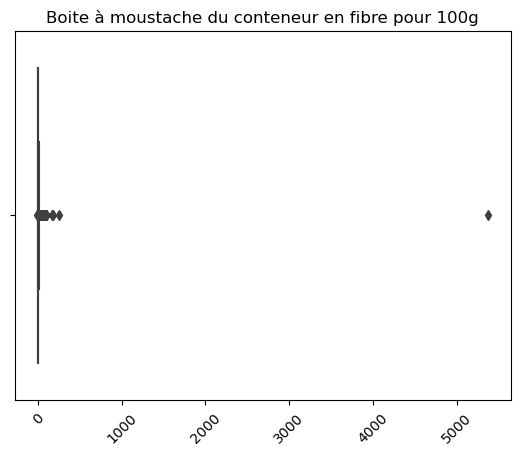

In [225]:
sns.boxplot(cc)
plt.title('Boite à moustache du conteneur en fibre pour 100g')
plt.xticks(rotation= 45)
plt.show()

# 

- Observation de quelques varaibles qualitatives (cathegorielle)

In [181]:
dd = list(epp1['pnns_groups_1'])
dd

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'unknown',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'unknown',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'unknown',
 nan,
 'unknown',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [182]:
ee = list(epp1['pnns_groups_2'])
ee

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'unknown',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'unknown',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'unknown',
 nan,
 'unknown',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan